In [ ]:
#Speech Emotion Analyzer using Convolutional Neural Network
#Importing Libraries
import os # provides functions for interacting with the operating
import sys # provides information about constants, functions and methods
import glob # glob module is used to retrieve files/pathnames matching a specified pattern
import numpy as np # used for working with arrays
import pandas as pd # library used for data analysis 

'''Import audio files
pip install librosa. Run this command in terminal to install librosa library'''

import librosa # librosa is a package to use audio files
import librosa.display  # for usage with audio signals
from scipy.io import wavfile #to import wav file
import scipy.io.wavfile
#import sys
import numpy as nm
''' Importing plotting packages'''
import matplotlib.pyplot as plt  #Plotting library
from matplotlib.pyplot import specgram 
import matplotlib.pyplot as plt 
import seaborn as sns 

''' Import Keras & Tenserflow packages'''
#pip install keras
#pip install tensorflow
import keras # to define and train neural network models
from keras import regularizers 
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer 
#from kersas.preprocessing.sequence import pad_sequences 
from keras.utils import to_categorical 
from keras.layers import Input, Flatten, Dropout, Activation
#from keras.layers import conv1D, MaxPoling1D, AveragePooling1D
from keras.models import Model
#from keras.models import ModelCheckpoint
from sklearn.metrics import confusion_matrix



**There are two datasets used for this project
RAVDESS: The RAVDESS file contains a unique filename that consists in a 7-part numerical identifier.
TESS: The TESS file contains a unique letter at beginning of file name to identify the emotion. bold text

In [ ]:
!pip install Pydrive

Authoriziation of google drive to access the data bold text

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import glob

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'20 shore breeze dr'    heli		      Shadi
'Anuj EI forms'        'Lunar Eclipse'	      Sponsor
'Assignment 1'	       'Mom- Dad'	      Stocks
'Colab Notebooks'      'Niagara Falls 2020'   swati
'Condo Lease'	       'Python Tutorial 1'    Tax
 creditcard_csv.csv     Rainbow		     'Titanic dataset'
 foo.txt	        RawData
'Getting started.pdf'   Resume


In [ ]:
#downloaded = drive.CreateFile({'id':"1lasJX-rkSCxzhcvauvSnMX2RPzQG7Ko4"})   # replace the id with id of file you want to access
#downloaded.GetContentFile('/content/gdrive/My\ Drive/RawData/Ravdess/audio_speech_actors')        # replace the file name with your file
import os
os.path.isfile("content/gdrive/My Drive/RawData/Ravdess/audio_speech_actors")

False

In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir("/content/drive/My Drive/RawData/Ravdess/audio_speech_actors") #change the current directory to the location where audio files are saved


In [ ]:
currentDir= !pwd
print(currentDir)      #Check the directory we are working in to

['/content/drive/My Drive/RawData/Ravdess/audio_speech_actors']


In [ ]:
#Build list of files
rawdata_list = os.listdir('/content/drive/My Drive/RawData/Ravdess/audio_speech_actors') #Create a list of audio files and assign it to variale rawdata_list

In [ ]:
print(rawdata_list)  #print the list

['03-01-01-01-01-01-08.wav', '03-01-08-02-02-01-07.wav', '03-01-05-02-02-02-08.wav', '03-01-07-01-02-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-08-01-02-01-07.wav', '03-01-06-01-01-02-08.wav', '03-01-07-02-01-02-07.wav', '03-01-04-01-02-01-08.wav', '03-01-03-02-02-02-08.wav', '03-01-02-01-02-02-08.wav', '03-01-05-02-02-01-08.wav', '03-01-05-02-01-01-08.wav', '03-01-03-01-02-02-08.wav', '03-01-03-02-02-01-08.wav', '03-01-08-02-01-02-07.wav', '03-01-08-02-01-01-07.wav', '03-01-02-01-02-01-08.wav', '03-01-03-01-02-01-09.wav', '03-01-06-02-02-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-07-02-02-01-08.wav', '03-01-02-02-02-01-09.wav', '03-01-08-02-02-02-08.wav', '03-01-01-01-02-02-09.wav', '03-01-05-01-01-01-09.wav', '03-01-06-02-02-02-08.wav', '03-01-08-01-01-01-08.wav', '03-01-04-02-01-02-09.wav', '03-01-02-01-02-02-09.wav', '03-01-06-01-02-01-08.wav', '03-01-02-01-01-02-09.wav', '03-01-05-01-02-01-09.wav', '03-01-04-01-01-01-09.wav', '03-01-03-02-02-01-09.wav', '03-01-04-02-01-01-

 ### Librosa and MFCC Configuration
**In order to analyze and standardize how each audio file feature was built, the following configurations were determined:
res_type: resample type (kaiser_best or kaiser_fast)

By default, this uses a high-quality (but relatively slow) method (‘kaiser_best’) for band-limited sinc interpolation. The alternate res_type values listed below offer different trade-offs of speed and quality.
librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
I will use this function to extract the audio amplitude at different sampling rates.
path: path to the input file.
sr: target sampling rate. The default
mono: convert signal to mono
offset: start reading after this time (in seconds)
duration: only load up to this much audio (in seconds)
res_type: resample type (kaiser_best or kaiser_fast)

In [ ]:
#sample feature
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_mfcc = 40
axis_mfcc = 1

Emotion features in Ravdess **bold text**

In [ ]:
#Build list with target variables for each file
feeling_list=[]

#Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fear, 07 = disgust, 08 = surprised)  Assign emotions based on filename

for emotion_path in rawdata_list:
  if emotion_path.split('-')[2] == '01':
        feeling_list.append("neutral")
  elif emotion_path.split('-')[2] == '02':
        feeling_list.append("calm")
  elif emotion_path.split('-')[2] == '03':
        feeling_list.append("happy")
  elif emotion_path.split('-')[2] == '04':
        feeling_list.append("sad")
  elif emotion_path.split('-')[2] == '05':
        feeling_list.append("angry")
  elif emotion_path.split('-')[2] == '06':
        feeling_list.append("fear")
  elif emotion_path.split('-')[2] == '07':
        feeling_list.append("disgust")
  elif emotion_path.split('-')[2] == '08':
        feeling_list.append("surprised")
  else:
        feeling_list.append("unknown")

In [ ]:
#Check list
feeling_list

['neutral',
 'surprised',
 'angry',
 'disgust',
 'neutral',
 'surprised',
 'fear',
 'disgust',
 'sad',
 'happy',
 'calm',
 'angry',
 'angry',
 'happy',
 'happy',
 'surprised',
 'surprised',
 'calm',
 'happy',
 'fear',
 'neutral',
 'disgust',
 'calm',
 'surprised',
 'neutral',
 'angry',
 'fear',
 'surprised',
 'sad',
 'calm',
 'fear',
 'calm',
 'angry',
 'sad',
 'happy',
 'sad',
 'calm',
 'happy',
 'calm',
 'happy',
 'sad',
 'disgust',
 'calm',
 'disgust',
 'sad',
 'neutral',
 'disgust',
 'happy',
 'happy',
 'surprised',
 'disgust',
 'happy',
 'happy',
 'surprised',
 'fear',
 'calm',
 'disgust',
 'sad',
 'angry',
 'angry',
 'surprised',
 'calm',
 'fear',
 'sad',
 'disgust',
 'surprised',
 'surprised',
 'fear',
 'surprised',
 'disgust',
 'sad',
 'neutral',
 'disgust',
 'disgust',
 'fear',
 'surprised',
 'surprised',
 'happy',
 'disgust',
 'calm',
 'surprised',
 'happy',
 'disgust',
 'angry',
 'disgust',
 'happy',
 'fear',
 'calm',
 'disgust',
 'fear',
 'fear',
 'surprised',
 'neutral',
 

In [ ]:
#Turn list into dataframe
labels = pd.DataFrame(feeling_list)

In [ ]:
#Check shape
labels.shape

(1440, 1)

In [ ]:
#Change index name to "emotion"
labels = labels.rename({0: 'emotion'}, axis=1)

In [ ]:
labels.shape

(1440, 1)

In [ ]:
#Count the number of files per emotion
labels_total = pd.DataFrame(labels.groupby(['emotion']).size())
labels_total

,0
emotion,
angry,192
calm,192
disgust,192
fear,192
happy,192
neutral,96
sad,192
surprised,192


In [ ]:
!pwd

/content/drive/My Drive/RawData/Ravdess/audio_speech_actors


In [ ]:
rawdata_ravdess = pd.DataFrame(columns=['feature'])
bookmark=0

for y in rawdata_list:
    #Change to kaiser_best & 22050 kHz
    #sr > target sampling rate
    #offset=0.5
    X, sample_rate = librosa.load('/content/drive/My Drive/RawData/Ravdess/audio_speech_actors/'+y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s)
    sample_rate = np.array(sample_rate)
    
    #Get MFCCs from each file
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    
    #Calculate mean of MFCCs
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    
    #Add MFCCs feature results to list
    rawdata_ravdess.loc[bookmark] = [feature]
    bookmark=bookmark+1   

In [ ]:
#Verify data results
rawdata_ravdess.shape

(1440, 1)

In [ ]:
#Check that there are no null values
rawdata_ravdess.isnull().values.any()

False

In [ ]:
#array sample of features
rawdata_ravdess

,feature
0,"[-661.5745020639513, 69.67652033083739, 5.9233..."
1,"[-502.0971055545157, 50.58711062081961, 3.2887..."
2,"[-452.5653756901126, 39.93916901772218, -9.630..."
3,"[-635.4895782102773, 62.03005305864584, 12.275..."
4,"[-655.3939554284203, 73.96182667564719, 4.3549..."
...,...
1435,"[-684.3011623653113, 72.4939351454901, 8.87928..."
1436,"[-600.1960346925722, 77.4466816575262, 7.16347..."
1437,"[-608.4275710990293, 72.14450047559284, -5.064..."
1438,"[-561.0254163204709, 51.6820425617632, 8.30940..."


In [ ]:
#Turn array into dataframe
rawdata_ravdess_final = pd.DataFrame(rawdata_ravdess['feature'].values.tolist())

In [ ]:
#Analyze new dataframe shape
rawdata_ravdess_final.shape

(1440, 40)

In [ ]:
# Check data sample
rawdata_ravdess_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-661.574502,69.676520,5.923312,22.288097,4.805842,0.356380,4.023391,-11.849270,1.079808,-2.929827,1.100001,-5.095632,-0.365886,3.195820,-3.074139,0.248920,-1.030297,3.169472,-0.768880,3.006026,-2.744657,3.286160,-2.425900,2.995592,-0.113231,2.719590,2.888955,3.291350,2.633784,2.533724,0.870294,2.203944,2.537358,6.992089,5.944191,6.525378,3.973266,7.174097,4.846119,5.619652
1,-502.097106,50.587111,3.288767,10.769257,2.444847,-10.715109,-11.203637,-10.420255,-6.647274,-5.623176,-10.658258,-2.447348,-5.646612,-6.334468,-3.231160,-5.315398,-7.644316,2.885220,-4.906295,2.796658,-1.878393,1.154040,-0.838594,-0.525718,0.495010,6.333774,3.040654,6.925971,2.943986,3.016187,0.497676,3.703281,-0.370146,3.417574,2.288687,2.459830,-0.276600,2.749783,2.215683,4.204724
2,-452.565376,39.939169,-9.630184,7.271324,-10.428089,-10.163440,7.229983,-13.705691,-6.651569,-6.641875,-5.259166,-3.355719,-3.805589,-2.046428,-4.222165,-2.410636,-0.689474,0.834895,1.552629,8.227607,4.166605,7.582254,5.111515,8.198871,3.365571,4.793096,3.153544,5.008101,3.871808,3.828441,0.173853,2.828381,1.661201,5.067069,3.413992,2.254228,0.529603,2.999946,1.958818,3.262427
3,-635.489578,62.030053,12.275998,17.167894,6.725879,-11.750009,-6.617999,-2.579333,-4.405124,-6.920371,-1.923003,-3.489321,-2.340789,-1.382679,-3.919484,-0.094955,-7.058839,-3.313550,-2.661342,-2.033815,-9.820454,-0.614457,-7.486428,-2.475153,-5.330659,0.569466,-5.298285,0.777268,-4.807220,-1.533852,-5.264574,-0.364468,-0.932271,-1.442100,-2.342138,-2.970903,-3.768007,-0.809151,-2.182618,-1.038466
4,-655.393955,73.961827,4.354992,21.876087,4.190839,-1.282472,3.903291,-10.225187,-0.757298,-3.200868,-0.480506,-3.227785,-1.710087,1.356434,-4.345168,-2.475923,-2.344494,3.478572,-0.023355,1.753235,-0.860022,-0.239904,-2.137390,2.250861,-1.630597,0.714148,0.205964,2.319787,3.546620,4.716005,3.163500,2.877844,2.385499,5.486393,5.249276,8.598787,5.223957,7.088691,2.155481,5.968132


In [ ]:
import pandas as pd
#Join labels with features
newdf_ravdess = pd.concat([rawdata_ravdess_final,labels], axis=1)

In [ ]:
#Rename dataframe
newdf_ravdess = newdf_ravdess.rename(index=str, columns={"0": "label"})

In [ ]:
#Analyze dataframe shape
newdf_ravdess.shape

(1440, 41)

In [ ]:
#Anayze dataframe sample
newdf_ravdess.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,-661.574502,69.676520,5.923312,22.288097,4.805842,0.356380,4.023391,-11.849270,1.079808,-2.929827,1.100001,-5.095632,-0.365886,3.195820,-3.074139,0.248920,-1.030297,3.169472,-0.768880,3.006026,-2.744657,3.286160,-2.425900,2.995592,-0.113231,2.719590,2.888955,3.291350,2.633784,2.533724,0.870294,2.203944,2.537358,6.992089,5.944191,6.525378,3.973266,7.174097,4.846119,5.619652,neutral
1,-502.097106,50.587111,3.288767,10.769257,2.444847,-10.715109,-11.203637,-10.420255,-6.647274,-5.623176,-10.658258,-2.447348,-5.646612,-6.334468,-3.231160,-5.315398,-7.644316,2.885220,-4.906295,2.796658,-1.878393,1.154040,-0.838594,-0.525718,0.495010,6.333774,3.040654,6.925971,2.943986,3.016187,0.497676,3.703281,-0.370146,3.417574,2.288687,2.459830,-0.276600,2.749783,2.215683,4.204724,surprised
2,-452.565376,39.939169,-9.630184,7.271324,-10.428089,-10.163440,7.229983,-13.705691,-6.651569,-6.641875,-5.259166,-3.355719,-3.805589,-2.046428,-4.222165,-2.410636,-0.689474,0.834895,1.552629,8.227607,4.166605,7.582254,5.111515,8.198871,3.365571,4.793096,3.153544,5.008101,3.871808,3.828441,0.173853,2.828381,1.661201,5.067069,3.413992,2.254228,0.529603,2.999946,1.958818,3.262427,angry
3,-635.489578,62.030053,12.275998,17.167894,6.725879,-11.750009,-6.617999,-2.579333,-4.405124,-6.920371,-1.923003,-3.489321,-2.340789,-1.382679,-3.919484,-0.094955,-7.058839,-3.313550,-2.661342,-2.033815,-9.820454,-0.614457,-7.486428,-2.475153,-5.330659,0.569466,-5.298285,0.777268,-4.807220,-1.533852,-5.264574,-0.364468,-0.932271,-1.442100,-2.342138,-2.970903,-3.768007,-0.809151,-2.182618,-1.038466,disgust
4,-655.393955,73.961827,4.354992,21.876087,4.190839,-1.282472,3.903291,-10.225187,-0.757298,-3.200868,-0.480506,-3.227785,-1.710087,1.356434,-4.345168,-2.475923,-2.344494,3.478572,-0.023355,1.753235,-0.860022,-0.239904,-2.137390,2.250861,-1.630597,0.714148,0.205964,2.319787,3.546620,4.716005,3.163500,2.877844,2.385499,5.486393,5.249276,8.598787,5.223957,7.088691,2.155481,5.968132,neutral


In [ ]:
#Datafram drop NA values
newdf_ravdess.dropna(inplace=True)  # Dropping N/A from the dataset

In [ ]:
from sklearn.utils import shuffle

#Shuffle dataframe
newdf_ravdess = shuffle(newdf_ravdess)
newdf_ravdess.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
323,-700.465194,80.230559,10.564310,13.029027,11.091900,3.874562,-5.510901,-5.345177,-2.573890,-0.673889,0.392309,-2.408997,2.525418,-0.168830,-1.312228,2.774212,-5.979146,0.667749,0.193819,0.501791,-2.683777,-2.029751,-2.367553,-1.141436,-2.367963,1.916573,-2.677335,1.816287,0.054541,1.243103,-1.467275,1.021649,-1.421999,-0.462996,-0.498508,1.342780,-2.206822,-1.741103,-3.915734,-1.821186,sad
73,-717.003867,83.888280,-1.679841,21.803051,15.142161,-3.292889,-5.157721,-5.914148,-2.761247,-0.595904,-3.310573,-2.288620,-0.291460,0.041156,-3.190943,-2.144226,0.300044,-2.064282,-4.289931,0.137468,-4.992696,-1.284479,-5.669641,-0.505159,-4.273479,0.617610,-5.131909,0.809431,-1.296556,-1.055980,-1.901807,-0.439506,-2.456776,0.662084,-1.923353,0.653458,-3.217094,-1.921911,-2.830837,0.223925,disgust
857,-452.465990,37.257573,-18.904832,0.569738,-5.735447,-15.712606,-11.591312,-12.151630,-15.100083,-1.093636,-8.702356,-8.992719,-4.303537,-7.720135,-1.631277,-9.628625,-8.687296,-4.899035,-10.319828,-2.696293,-1.503472,1.780553,-1.595909,2.363273,-3.353064,2.739598,2.502345,8.303817,6.379428,7.202407,0.381023,1.055769,-2.600306,3.439115,-1.035777,2.370044,0.455522,-0.916041,-3.001796,2.010838,angry
1112,-510.445935,41.880104,-26.895599,4.737289,-13.304676,-9.459716,-4.529321,-8.957624,-7.086170,-4.132012,-7.390986,-2.852085,-2.279928,7.284776,0.532389,1.126988,-2.366601,0.125168,-6.495469,0.615671,-2.581087,-4.985850,-4.479335,-1.191135,0.093093,1.397716,2.547810,4.798580,3.535358,2.430223,0.997885,5.204259,2.954844,3.637176,0.771369,2.360555,-0.295770,1.191903,0.884064,2.030977,surprised
283,-685.827785,76.670827,10.094774,10.974213,7.346909,1.876747,-7.741616,-7.118613,-5.279741,-0.057862,-0.630266,-4.555535,4.727235,1.181707,-2.024409,2.776519,-6.422023,-0.369977,1.389452,-2.541007,-2.531662,-0.877178,-3.731515,-1.610727,-3.368385,1.882448,-2.457062,-0.336542,-1.163353,0.905962,-2.107157,-0.389689,-3.105620,-1.098788,-0.638983,1.171094,-2.007857,-2.109145,-4.342681,-0.059238,sad
598,-559.262381,54.804195,5.299222,15.230014,9.204083,4.984030,3.662287,-4.523214,-5.759973,5.485799,-3.999545,-2.825053,3.922551,-0.434231,-1.834323,0.588973,-1.465555,-0.212644,0.256722,0.269961,-3.535303,-0.729615,-3.382001,-0.884399,-1.955616,1.524731,-1.670289,1.324402,-1.457875,0.023377,-2.611106,0.309520,-1.626068,0.050211,-2.249222,-1.257962,-1.547208,-2.740591,-3.010229,-1.892434,disgust
1268,-732.973768,79.283225,8.568679,25.245742,9.849125,1.568460,1.342044,-2.786634,-1.373632,5.915318,0.563461,4.400384,-3.056015,-0.122928,-0.309397,2.935448,-1.615538,2.329619,-0.455409,2.969733,-4.075269,2.676755,-7.004506,1.005295,-3.380965,6.380234,-1.186214,-0.332628,-0.026162,1.497638,-0.747849,1.539397,-3.161059,3.447215,-0.104803,2.556648,-3.595147,-1.097785,-4.255132,1.742702,sad
1272,-701.768036,60.012767,-4.341862,8.746824,5.357543,-9.448674,-19.886486,-12.799834,-4.340140,-0.741839,-7.106453,-6.400804,-8.715565,-1.317090,-4.634917,-1.599184,-7.844811,-4.096831,-3.985855,-7.204698,-3.777962,-1.577492,-8.168616,-1.414759,-6.967759,3.400308,-1.654118,4.006270,-1.774382,5.700883,-2.125799,5.980746,6.159079,15.650836,11.734875,13.153930,5.518246,7.009750,5.973912,7.575933,calm


In [ ]:
#Verify that there are no null values
newdf_ravdess.isnull().values.any()

False

In [ ]:
# Check dataframe sample
newdf_ravdess.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
323,-700.465194,80.230559,10.564310,13.029027,11.091900,3.874562,-5.510901,-5.345177,-2.573890,-0.673889,0.392309,-2.408997,2.525418,-0.168830,-1.312228,2.774212,-5.979146,0.667749,0.193819,0.501791,-2.683777,-2.029751,-2.367553,-1.141436,-2.367963,1.916573,-2.677335,1.816287,0.054541,1.243103,-1.467275,1.021649,-1.421999,-0.462996,-0.498508,1.342780,-2.206822,-1.741103,-3.915734,-1.821186,sad
73,-717.003867,83.888280,-1.679841,21.803051,15.142161,-3.292889,-5.157721,-5.914148,-2.761247,-0.595904,-3.310573,-2.288620,-0.291460,0.041156,-3.190943,-2.144226,0.300044,-2.064282,-4.289931,0.137468,-4.992696,-1.284479,-5.669641,-0.505159,-4.273479,0.617610,-5.131909,0.809431,-1.296556,-1.055980,-1.901807,-0.439506,-2.456776,0.662084,-1.923353,0.653458,-3.217094,-1.921911,-2.830837,0.223925,disgust
857,-452.465990,37.257573,-18.904832,0.569738,-5.735447,-15.712606,-11.591312,-12.151630,-15.100083,-1.093636,-8.702356,-8.992719,-4.303537,-7.720135,-1.631277,-9.628625,-8.687296,-4.899035,-10.319828,-2.696293,-1.503472,1.780553,-1.595909,2.363273,-3.353064,2.739598,2.502345,8.303817,6.379428,7.202407,0.381023,1.055769,-2.600306,3.439115,-1.035777,2.370044,0.455522,-0.916041,-3.001796,2.010838,angry
1112,-510.445935,41.880104,-26.895599,4.737289,-13.304676,-9.459716,-4.529321,-8.957624,-7.086170,-4.132012,-7.390986,-2.852085,-2.279928,7.284776,0.532389,1.126988,-2.366601,0.125168,-6.495469,0.615671,-2.581087,-4.985850,-4.479335,-1.191135,0.093093,1.397716,2.547810,4.798580,3.535358,2.430223,0.997885,5.204259,2.954844,3.637176,0.771369,2.360555,-0.295770,1.191903,0.884064,2.030977,surprised
283,-685.827785,76.670827,10.094774,10.974213,7.346909,1.876747,-7.741616,-7.118613,-5.279741,-0.057862,-0.630266,-4.555535,4.727235,1.181707,-2.024409,2.776519,-6.422023,-0.369977,1.389452,-2.541007,-2.531662,-0.877178,-3.731515,-1.610727,-3.368385,1.882448,-2.457062,-0.336542,-1.163353,0.905962,-2.107157,-0.389689,-3.105620,-1.098788,-0.638983,1.171094,-2.007857,-2.109145,-4.342681,-0.059238,sad


In [ ]:
#Analyz shape of dataframe
newdf_ravdess.shape

(1440, 41)

In [ ]:
# see number of emotions
newdf_ravdess[newdf_ravdess.columns[-1]].nunique()

8

In [ ]:
#Move dataframe into separate file
newdf_ravdess.to_csv('emotion_capstone_final_ravdess_dataframe_Anuj_Goyal.csv')

**Import and read TESS Dataset**

In [ ]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import glob 
import sys
import os
# Build list of audio files

os.chdir('/content/drive/My Drive/RawData/TESS Toronto emotional speech set data')

mypath = !pwd
raw_data_tess_path1=str(mypath)
raw_data_tess_path2 = raw_data_tess_path1.replace("'", "")
raw_data_tess_path3 = raw_data_tess_path2.replace("[", "")
raw_data_tess_path = raw_data_tess_path3.replace("]", "/")




print(raw_data_tess_path)
folder_list_tess = os.listdir('/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/')

#print(folder_list_tess)

/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/


In [ ]:
tess_list = []

for folder in folder_list_tess:
    folder_path = raw_data_tess_path + folder+'//'
    os.chdir(folder_path)
    for file in glob.glob("*.wav"):
        tess_list.append(folder_path+file)

#Check results
tess_list[:8]
#print(len(tess_list))

['/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_ton_ps.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_take_ps.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_back_sad.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_wheat_ps.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_thumb_ps.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_bite_sad.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_void_ps.wav',
 '/content/drive/My Drive/RawData/TESS Toronto emotional speech set data/TESS Full Dataset//OAF_team_ps.wav']

In [ ]:
#Build list of emotions for Tess
feeling_list_tess = []

#'angry', 'disgust', 'fear', 'happy', 'sad' and 'surprised' emotion classes respectively.  

emotion_dic = {"angry":'angry', 
               "disgust":'disgust', 
               "fear":'fear', 
               "happy":'happy',  
               "sad":'sad', 
               "ps":'surprised',
               "neutral" :'neutral'}

for file_path in tess_list:
    file = file_path.split("\\")[-1] 
    file_name = file.split(".")[0] 
    #print(file_name)
    #x= file_name.rsplit('_')[-1]
    x=file_name.split("_")[-1]
    feeling_list_tess.append(emotion_dic[x])

#Verify emotions
feeling_list_tess

['surprised',
 'surprised',
 'sad',
 'surprised',
 'surprised',
 'sad',
 'surprised',
 'surprised',
 'surprised',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad'

In [ ]:
#Build dataframe from array
labels_tess = pd.DataFrame(feeling_list_tess)

In [ ]:
#Check results
labels_tess.head()

,0
0,surprised
1,surprised
2,sad
3,surprised
4,surprised


In [ ]:
print(labels_tess)

              0
0     surprised
1     surprised
2           sad
3     surprised
4     surprised
...         ...
1395        sad
1396        sad
1397  surprised
1398  surprised
1399  surprised

[1400 rows x 1 columns]


In [ ]:
#Rename column to emotion
labels_tess = labels_tess.rename({0: 'emotion'}, axis=1)

In [ ]:
#Check shape
labels_tess.shape

(1400, 1)

In [ ]:
#Check results
labels_tess.head()

,emotion
0,surprised
1,surprised
2,sad
3,surprised
4,surprised


In [ ]:
#Check emotion size
labels_tess_total = pd.DataFrame(labels_tess.groupby(['emotion']).size())
labels_tess_total

,0
emotion,
angry,200
disgust,200
fear,200
happy,200
neutral,200
sad,200
surprised,200


**Audio features for TESS**

In [ ]:
rawdata_tess = pd.DataFrame(columns=['feature'])
bookmark=0

for y in tess_list:
    #Get audio features
    X, sample_rate = librosa.load(y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset=offset_s)
    
    #Get MFFC features
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    #Get MFFCs average features
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    rawdata_tess.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [ ]:
#Verify Tess features shape
rawdata_tess.shape

(1400, 1)

In [ ]:
#Check that there are no nan values
rawdata_tess.isnull().values.any()

False

In [ ]:
#Get sample data
rawdata_tess.head()

,feature
0,"[-393.0647126906751, 104.22833070965264, -8.03..."
1,"[-428.4309886544094, 95.77367454846998, -3.015..."
2,"[-558.203237808443, 102.06020857774865, 23.940..."
3,"[-466.74610210435526, 104.01774037812116, 27.2..."
4,"[-421.5367021670852, 91.8683265812232, 20.3362..."


In [ ]:
#Build list
rawdata_tess_final = pd.DataFrame(rawdata_tess['feature'].values.tolist())

In [ ]:
#Check dataframe
rawdata_tess_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-393.064713,104.228331,-8.033372,-12.158992,4.100746,-3.314525,-12.176581,1.024435,-19.445951,-2.537471,-16.357301,-8.237990,-9.272872,-5.568253,-4.608080,-0.588412,-0.219854,12.784038,4.757206,3.076212,4.196416,3.117582,-2.327549,4.288047,-5.832544,3.408224,-7.591838,4.083526,-3.913253,1.166156,-2.227586,3.045442,5.947820,10.955508,14.158756,16.401156,17.695173,13.962237,7.746469,6.926811
1,-428.430989,95.773675,-3.015110,4.586076,8.635063,-8.666693,-19.007385,0.149618,-19.919284,-5.409258,-19.125048,-5.134354,-0.702090,-6.216142,-0.749200,4.695921,2.508728,10.645043,2.971020,-2.596046,2.236927,-1.994673,-3.324532,4.053984,-6.072053,4.405573,-7.259748,6.332849,-2.627318,5.356078,6.282688,10.086893,15.258396,11.157198,11.810318,15.538712,11.697254,13.231740,7.501947,5.610825
2,-558.203238,102.060209,23.940581,10.404611,19.730547,16.288045,-10.664006,-8.242809,-14.201682,4.116901,-8.920832,7.290155,-8.062274,10.366964,4.709728,-1.621492,-2.694772,0.443869,3.679745,-3.409293,0.952581,2.139629,-5.205762,0.368632,-9.357077,0.518335,-2.416305,0.375091,-5.576669,7.667675,2.700076,11.158257,9.590239,11.256332,6.021088,8.419053,8.397544,8.734387,14.692656,15.106056
3,-466.746102,104.017740,27.219596,6.671581,16.054953,-7.443586,-3.763945,-3.696580,-21.906358,-3.656409,-19.845797,-8.962653,-3.655293,-4.544420,-2.447305,-2.139093,-1.049097,8.816945,4.000953,4.567353,1.232990,4.522492,-3.937750,2.564885,-1.887262,2.615352,-7.010739,3.596605,-5.019797,4.226246,-5.000799,-2.588915,-0.877083,2.580161,8.807711,14.667746,17.298415,19.770818,15.453272,12.034192
4,-421.536702,91.868327,20.336208,-14.177895,0.049593,5.512608,-0.112384,1.610796,-20.670020,-3.775931,-13.735750,-10.048589,-0.280590,-3.806409,-4.976410,1.123034,-4.974939,10.310057,0.141979,2.730788,2.355703,0.102942,-4.933080,4.832973,-2.421800,4.265729,-4.167171,1.713591,-3.695982,3.523024,-0.301838,3.555023,4.302198,5.961743,9.137798,11.396955,14.041527,16.377250,15.402454,17.600358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-536.512004,106.750789,28.416613,8.970444,20.742506,15.393349,-3.771040,-6.118925,-15.442299,3.508829,-4.770205,4.086547,-9.679314,3.731612,2.432980,-1.037491,-4.089450,1.013642,1.441648,-4.594456,3.616582,-0.188733,-2.437144,0.380347,-8.227229,0.553122,-4.522375,-1.881177,-2.514969,3.077675,-1.343018,4.283805,3.199174,6.232114,5.782828,10.894559,12.079333,12.207502,14.399904,15.214200
1396,-564.497439,107.950099,43.945294,20.696722,21.444244,10.099970,2.063429,3.800612,-12.632793,-3.802378,-11.338892,-3.508805,-11.080032,-0.658633,-0.284242,-2.265595,-2.161875,2.341401,1.075981,-3.106282,-1.489145,-1.749032,-7.218842,2.599768,-5.201615,2.952039,-2.472093,2.788030,-2.244446,6.261553,6.464332,11.287631,7.459670,6.585104,4.575772,1.036401,4.038626,10.445570,10.675918,12.832165
1397,-446.383881,107.507493,4.796736,-18.311295,7.222064,0.628212,-11.116405,6.811908,-20.391670,-6.312933,-16.073757,-13.446818,-4.691627,-5.268364,-6.376009,2.949287,-3.611500,10.716067,2.311542,2.683717,2.961281,4.930986,-6.079398,0.982605,-7.645687,5.621020,-7.304281,2.923446,-6.140193,1.304108,3.121570,9.344289,16.819454,22.416956,20.046057,17.531816,13.351365,7.906923,5.254256,8.847595
1398,-426.421793,107.677444,3.488945,-19.908305,12.159415,3.757812,-12.084943,-0.945416,-16.076738,1.252954,-15.231416,-6.658887,-3.545313,0.778354,-6.373714,6.122555,-4.487575,7.011531,2.656823,-2.073471,2.341065,2.543179,-4.284626,3.369041,-3.004752,3.613262,-5.124739,4.644774,-3.607881,5.335443,-3.165052,-0.532723,-0.581784,1.810781,4.440430,9.705201,11.659803,15.595808,15.266903,15.747191


**Combine TESS features and targets**

In [ ]:
#Concat both feature table and target table 
newdf_tess = pd.concat([rawdata_tess_final,labels_tess], axis=1)
newdf_tess

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,-393.064713,104.228331,-8.033372,-12.158992,4.100746,-3.314525,-12.176581,1.024435,-19.445951,-2.537471,-16.357301,-8.237990,-9.272872,-5.568253,-4.608080,-0.588412,-0.219854,12.784038,4.757206,3.076212,4.196416,3.117582,-2.327549,4.288047,-5.832544,3.408224,-7.591838,4.083526,-3.913253,1.166156,-2.227586,3.045442,5.947820,10.955508,14.158756,16.401156,17.695173,13.962237,7.746469,6.926811,surprised
1,-428.430989,95.773675,-3.015110,4.586076,8.635063,-8.666693,-19.007385,0.149618,-19.919284,-5.409258,-19.125048,-5.134354,-0.702090,-6.216142,-0.749200,4.695921,2.508728,10.645043,2.971020,-2.596046,2.236927,-1.994673,-3.324532,4.053984,-6.072053,4.405573,-7.259748,6.332849,-2.627318,5.356078,6.282688,10.086893,15.258396,11.157198,11.810318,15.538712,11.697254,13.231740,7.501947,5.610825,surprised
2,-558.203238,102.060209,23.940581,10.404611,19.730547,16.288045,-10.664006,-8.242809,-14.201682,4.116901,-8.920832,7.290155,-8.062274,10.366964,4.709728,-1.621492,-2.694772,0.443869,3.679745,-3.409293,0.952581,2.139629,-5.205762,0.368632,-9.357077,0.518335,-2.416305,0.375091,-5.576669,7.667675,2.700076,11.158257,9.590239,11.256332,6.021088,8.419053,8.397544,8.734387,14.692656,15.106056,sad
3,-466.746102,104.017740,27.219596,6.671581,16.054953,-7.443586,-3.763945,-3.696580,-21.906358,-3.656409,-19.845797,-8.962653,-3.655293,-4.544420,-2.447305,-2.139093,-1.049097,8.816945,4.000953,4.567353,1.232990,4.522492,-3.937750,2.564885,-1.887262,2.615352,-7.010739,3.596605,-5.019797,4.226246,-5.000799,-2.588915,-0.877083,2.580161,8.807711,14.667746,17.298415,19.770818,15.453272,12.034192,surprised
4,-421.536702,91.868327,20.336208,-14.177895,0.049593,5.512608,-0.112384,1.610796,-20.670020,-3.775931,-13.735750,-10.048589,-0.280590,-3.806409,-4.976410,1.123034,-4.974939,10.310057,0.141979,2.730788,2.355703,0.102942,-4.933080,4.832973,-2.421800,4.265729,-4.167171,1.713591,-3.695982,3.523024,-0.301838,3.555023,4.302198,5.961743,9.137798,11.396955,14.041527,16.377250,15.402454,17.600358,surprised
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-536.512004,106.750789,28.416613,8.970444,20.742506,15.393349,-3.771040,-6.118925,-15.442299,3.508829,-4.770205,4.086547,-9.679314,3.731612,2.432980,-1.037491,-4.089450,1.013642,1.441648,-4.594456,3.616582,-0.188733,-2.437144,0.380347,-8.227229,0.553122,-4.522375,-1.881177,-2.514969,3.077675,-1.343018,4.283805,3.199174,6.232114,5.782828,10.894559,12.079333,12.207502,14.399904,15.214200,sad
1396,-564.497439,107.950099,43.945294,20.696722,21.444244,10.099970,2.063429,3.800612,-12.632793,-3.802378,-11.338892,-3.508805,-11.080032,-0.658633,-0.284242,-2.265595,-2.161875,2.341401,1.075981,-3.106282,-1.489145,-1.749032,-7.218842,2.599768,-5.201615,2.952039,-2.472093,2.788030,-2.244446,6.261553,6.464332,11.287631,7.459670,6.585104,4.575772,1.036401,4.038626,10.445570,10.675918,12.832165,sad
1397,-446.383881,107.507493,4.796736,-18.311295,7.222064,0.628212,-11.116405,6.811908,-20.391670,-6.312933,-16.073757,-13.446818,-4.691627,-5.268364,-6.376009,2.949287,-3.611500,10.716067,2.311542,2.683717,2.961281,4.930986,-6.079398,0.982605,-7.645687,5.621020,-7.304281,2.923446,-6.140193,1.304108,3.121570,9.344289,16.819454,22.416956,20.046057,17.531816,13.351365,7.906923,5.254256,8.847595,surprised
1398,-426.421793,107.677444,3.488945,-19.908305,12.159415,3.757812,-12.084943,-0.945416,-16.076738,1.252954,-15.231416,-6.658887,-3.545313,0.778354,-6.373714,6.122555,-4.487575,7.011531,2.656823,-2.073471,2.341065,2.543179,-4.284626,3.369041,-3.004752,3.613262,-5.124739,4.644774,-3.607881,5.335443,-3.165052,-0.532723,-0.581784,1.810781,4.440430,9.705201,11.659803,15.595808,15.266903,15.747191,surprised


In [ ]:
newdf_tess = newdf_tess.rename(index=str, columns={"0": "label"})

In [ ]:
#Verify table shape
newdf_tess.shape

(1400, 41)

In [ ]:
#Get dataframe sample data
newdf_tess.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,-393.064713,104.228331,-8.033372,-12.158992,4.100746,-3.314525,-12.176581,1.024435,-19.445951,-2.537471,-16.357301,-8.237990,-9.272872,-5.568253,-4.608080,-0.588412,-0.219854,12.784038,4.757206,3.076212,4.196416,3.117582,-2.327549,4.288047,-5.832544,3.408224,-7.591838,4.083526,-3.913253,1.166156,-2.227586,3.045442,5.947820,10.955508,14.158756,16.401156,17.695173,13.962237,7.746469,6.926811,surprised
1,-428.430989,95.773675,-3.015110,4.586076,8.635063,-8.666693,-19.007385,0.149618,-19.919284,-5.409258,-19.125048,-5.134354,-0.702090,-6.216142,-0.749200,4.695921,2.508728,10.645043,2.971020,-2.596046,2.236927,-1.994673,-3.324532,4.053984,-6.072053,4.405573,-7.259748,6.332849,-2.627318,5.356078,6.282688,10.086893,15.258396,11.157198,11.810318,15.538712,11.697254,13.231740,7.501947,5.610825,surprised
2,-558.203238,102.060209,23.940581,10.404611,19.730547,16.288045,-10.664006,-8.242809,-14.201682,4.116901,-8.920832,7.290155,-8.062274,10.366964,4.709728,-1.621492,-2.694772,0.443869,3.679745,-3.409293,0.952581,2.139629,-5.205762,0.368632,-9.357077,0.518335,-2.416305,0.375091,-5.576669,7.667675,2.700076,11.158257,9.590239,11.256332,6.021088,8.419053,8.397544,8.734387,14.692656,15.106056,sad
3,-466.746102,104.017740,27.219596,6.671581,16.054953,-7.443586,-3.763945,-3.696580,-21.906358,-3.656409,-19.845797,-8.962653,-3.655293,-4.544420,-2.447305,-2.139093,-1.049097,8.816945,4.000953,4.567353,1.232990,4.522492,-3.937750,2.564885,-1.887262,2.615352,-7.010739,3.596605,-5.019797,4.226246,-5.000799,-2.588915,-0.877083,2.580161,8.807711,14.667746,17.298415,19.770818,15.453272,12.034192,surprised
4,-421.536702,91.868327,20.336208,-14.177895,0.049593,5.512608,-0.112384,1.610796,-20.670020,-3.775931,-13.735750,-10.048589,-0.280590,-3.806409,-4.976410,1.123034,-4.974939,10.310057,0.141979,2.730788,2.355703,0.102942,-4.933080,4.832973,-2.421800,4.265729,-4.167171,1.713591,-3.695982,3.523024,-0.301838,3.555023,4.302198,5.961743,9.137798,11.396955,14.041527,16.377250,15.402454,17.600358,surprised


In [ ]:
#Drop nan values
newdf_tess.dropna(inplace=True)
newdf_tess.shape

(1400, 41)

In [ ]:
#Shuffle rows
newdf_tess = shuffle(newdf_tess)
newdf_tess.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
216,-443.267443,91.480847,-22.266353,-19.651573,2.295829,2.406949,-12.654018,-2.128104,-7.724178,1.098573,-9.951724,12.085358,-2.205219,5.455256,-0.316671,1.166338,-4.711159,-1.716382,-0.423923,-8.062828,1.406637,4.138436,-3.176719,0.768425,-4.524611,6.663495,9.228883,20.092700,23.747495,24.142723,12.868108,11.436149,3.975465,4.619808,6.937012,3.786846,3.204611,4.939377,6.110039,9.084782,angry
442,-471.463968,98.650907,7.903404,-3.941080,18.837330,2.044737,-15.975971,-2.959546,-18.122610,6.879299,-16.646434,4.097714,-0.857915,3.489674,-3.765835,2.918731,-3.757176,2.377823,-1.242452,-6.277968,0.895196,-4.113698,-5.169483,0.377353,-3.945141,4.416433,-2.251787,6.370330,0.611183,5.666947,2.529478,6.699400,2.452886,8.769439,5.665277,9.313270,8.714828,10.436886,10.593751,10.962625,disgust
995,-550.740649,127.662520,28.384287,-11.330223,3.821220,11.367295,-1.873645,-8.132485,-13.270748,-1.378248,-8.919118,5.620627,-7.414607,2.326069,5.190030,3.543029,-9.392906,5.641604,-0.939572,-1.860928,-0.962005,3.888815,-6.337806,2.066670,-7.300816,1.516491,-12.246327,0.480155,-3.866649,1.251529,-8.829708,-2.181695,-11.380516,-10.323473,-1.807961,3.295146,21.585265,35.222190,40.381506,39.654639,neutral
1037,-459.320449,83.307677,4.063739,-15.412967,5.012141,3.355058,-11.575129,-8.613219,-9.939612,3.037789,-20.096872,-5.847600,-4.012146,1.140682,-4.891642,2.884828,-2.711576,3.760706,3.811507,-1.795288,2.906209,14.579481,11.176277,28.131438,26.105212,20.851078,7.692142,1.055507,-5.597061,8.420346,0.900755,2.696065,-5.460098,-5.012153,4.052532,3.968012,-0.198604,-0.740551,-3.969437,1.086590,fear
484,-489.181218,105.235204,27.295663,9.312407,13.725330,3.438421,-8.271172,4.034785,-18.007162,-4.932476,-11.327717,-3.064571,-1.801887,-3.752025,-3.380412,1.109841,-6.175407,0.665546,0.900253,-0.687089,-0.665641,-5.435468,-4.457740,-0.671295,-2.516225,7.580088,-6.037535,5.520105,-2.387220,2.134916,-1.507221,0.571766,0.212845,5.895021,7.823471,9.987390,8.379662,8.903391,8.301577,6.840812,disgust
1290,-418.882035,82.284030,18.878110,9.514804,1.284510,-3.107163,-11.340016,1.384040,-21.997601,-7.349861,-21.754361,-9.374303,-12.265011,-1.421941,-2.744170,2.961556,0.192093,12.449707,4.932235,6.805188,-0.796118,3.123402,-0.357002,2.001338,-3.804429,6.154763,-4.704006,3.195337,-2.438352,0.144530,-4.683407,-2.773092,-0.887827,-0.230087,4.420429,9.682926,13.622841,16.073257,16.540384,18.016623,surprised
1141,-467.998532,84.085768,6.838976,-17.115407,-10.995144,6.139339,-5.361411,3.276160,-13.728011,0.904623,-17.567343,-1.271211,-7.756592,3.968817,-5.993727,1.171729,-5.259520,3.140128,5.510214,-1.185657,-0.367256,18.513789,18.288770,24.208710,26.081730,20.300500,5.232305,0.894556,-2.960548,5.318306,3.347530,1.278035,-2.426590,-6.979141,1.267802,6.200952,-1.116349,-0.285679,-2.134299,1.048398,fear
1086,-455.988349,73.358283,18.741088,-16.377155,1.627072,13.450163,-8.709233,-6.117675,-18.021275,-0.622443,-21.963845,-14.003847,-4.463417,-5.702043,-7.919980,4.370690,-10.512115,4.817484,-3.150019,-3.310560,4.531438,22.781396,30.450685,35.525957,24.064148,21.514712,0.098162,1.437664,3.016825,8.826611,0.546219,-0.260688,-6.823624,-2.293397,1.889748,1.851612,-6.549004,0.650272,-6.459455,2.584758,fear
831,-532.948221,121.295196,30.676236,-6.993068,6.744913,4.991159,7.196463,-9.262062,-10.099275,-2.188667,-12.923174,-1.185144,-3.336301,0.147491,5.167661,4.757711,-2.033000,7.449542,-5.401982,-2.095449,-2.285493,2.295830,-5.073571,1.681777,-11.204038,-2.074542,-7.769662,-0.225860,-9.050790,0.205469,-12.378577,-3.311283,-13.780621,-1.720255,11.534170,23.488522,36.923685,43.482445,32.113329,20.204483,neutral
1064,-423.796838,40.557490,11.521531,6.058275,-6.377779,8.564425,-8.648134,-2.525176,-12.807645,-7.915400,-20.338803,1.417798,-12.193282,4.830504,-4.504048,-1.996348,-0.488375,2.694740,-1.970091,2.977324,8.106264,22.553594,27.127716,33.081702,14.909275,12.80972

In [ ]:
#Verify there are no nan values
newdf_tess.isnull().values.any()

False

In [ ]:
#Check shape
newdf_tess.shape

(1400, 41)

In [ ]:
# See number of emotions
newdf_tess[newdf_tess.columns[-1]].nunique()

7

In [ ]:
#Move dataframe into separate file
newdf_tess.to_csv('emotion_capstone_final_tess_dataframe_Anuj_Goyal.csv')

** Join RAVDESS + TESS dataframes**

In [ ]:
newdf_ravdess.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [ ]:
newdf_tess.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [ ]:
frames = [newdf_ravdess,newdf_tess]

final_dataframe = pd.concat(frames, ignore_index=True)
final_dataframe.shape

(2840, 41)

In [ ]:
#Check new and final dataframe
final_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,-700.465194,80.230559,10.564310,13.029027,11.091900,3.874562,-5.510901,-5.345177,-2.573890,-0.673889,0.392309,-2.408997,2.525418,-0.168830,-1.312228,2.774212,-5.979146,0.667749,0.193819,0.501791,-2.683777,-2.029751,-2.367553,-1.141436,-2.367963,1.916573,-2.677335,1.816287,0.054541,1.243103,-1.467275,1.021649,-1.421999,-0.462996,-0.498508,1.342780,-2.206822,-1.741103,-3.915734,-1.821186,sad
1,-717.003867,83.888280,-1.679841,21.803051,15.142161,-3.292889,-5.157721,-5.914148,-2.761247,-0.595904,-3.310573,-2.288620,-0.291460,0.041156,-3.190943,-2.144226,0.300044,-2.064282,-4.289931,0.137468,-4.992696,-1.284479,-5.669641,-0.505159,-4.273479,0.617610,-5.131909,0.809431,-1.296556,-1.055980,-1.901807,-0.439506,-2.456776,0.662084,-1.923353,0.653458,-3.217094,-1.921911,-2.830837,0.223925,disgust
2,-452.465990,37.257573,-18.904832,0.569738,-5.735447,-15.712606,-11.591312,-12.151630,-15.100083,-1.093636,-8.702356,-8.992719,-4.303537,-7.720135,-1.631277,-9.628625,-8.687296,-4.899035,-10.319828,-2.696293,-1.503472,1.780553,-1.595909,2.363273,-3.353064,2.739598,2.502345,8.303817,6.379428,7.202407,0.381023,1.055769,-2.600306,3.439115,-1.035777,2.370044,0.455522,-0.916041,-3.001796,2.010838,angry
3,-510.445935,41.880104,-26.895599,4.737289,-13.304676,-9.459716,-4.529321,-8.957624,-7.086170,-4.132012,-7.390986,-2.852085,-2.279928,7.284776,0.532389,1.126988,-2.366601,0.125168,-6.495469,0.615671,-2.581087,-4.985850,-4.479335,-1.191135,0.093093,1.397716,2.547810,4.798580,3.535358,2.430223,0.997885,5.204259,2.954844,3.637176,0.771369,2.360555,-0.295770,1.191903,0.884064,2.030977,surprised
4,-685.827785,76.670827,10.094774,10.974213,7.346909,1.876747,-7.741616,-7.118613,-5.279741,-0.057862,-0.630266,-4.555535,4.727235,1.181707,-2.024409,2.776519,-6.422023,-0.369977,1.389452,-2.541007,-2.531662,-0.877178,-3.731515,-1.610727,-3.368385,1.882448,-2.457062,-0.336542,-1.163353,0.905962,-2.107157,-0.389689,-3.105620,-1.098788,-0.638983,1.171094,-2.007857,-2.109145,-4.342681,-0.059238,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,-432.089688,75.625378,7.658489,-11.097264,8.466153,-0.345052,-14.057680,-7.640028,-24.013756,-3.931910,-22.269634,-7.997254,-7.916211,-5.986144,-5.270567,-1.372138,-9.282765,2.054631,0.968665,-0.783342,10.000794,29.054125,28.125273,34.752221,16.251767,16.672187,-4.248879,3.142496,3.215965,10.116105,-2.097803,-1.162807,-6.323223,-3.520415,1.779697,-1.017936,-6.702353,-1.976204,-6.698279,4.706879,fear
2836,-473.272221,115.576265,38.611226,3.412331,-12.681405,-18.350570,-7.969607,0.047613,-22.343321,4.069254,-5.234553,-2.516936,-5.351526,2.734679,-4.318365,4.035182,-2.471810,0.889401,2.829009,-4.669647,3.924294,-2.562713,-9.283189,1.811824,-6.313997,3.266915,0.599077,3.225617,1.003818,6.314764,-1.272496,3.331169,7.803625,8.911167,16.219929,16.639422,18.717457,13.232013,6.033345,5.483398,disgust
2837,-381.145524,62.915550,-13.725642,9.125919,-2.313837,-0.257890,-22.317214,-6.224561,-15.022983,-14.683561,-3.984423,-4.195133,0.727059,2.491237,-5.068770,2.930261,-4.846201,-1.905542,-2.702085,-8.054186,-4.003416,-2.112123,-6.228324,9.780422,7.291070,21.882700,17.366756,22.980744,14.703926,9.138696,0.218479,2.631191,9.591179,7.815220,7.265786,-0.361340,1.759465,9.289201,3.940400,2.684433,angry
2838,-511.394132,102.281986,33.366969,0.510555,12.851061,-1.049558,-4.020566,2.821148,-16.836800,-1.047038,-6.142547,-3.217970,-4.129424,0.925570,-0.065664,5.537636,-0.344621,1.484196,-1.490290,-1.790118,-2.624376,0.117570,-6.816874,0.585190,-4.184653,1.206065,-2.730375,3.899776,0.365762,1.848094,0.765180,5.845164,1.064252,3.695988,5.979508,7.621558,4.094419,9.770634,9.792104,13.652220,disgust


In [ ]:
#Move dataframe into separate file
final_dataframe.to_csv('emotion_capstone_final_dataframe_Anuj_Goyal.csv')

**Divide the data in to train and test set**

In [ ]:
#Split features from targets
X = final_dataframe.iloc[:,:-1]

#Split targets
y = final_dataframe.iloc[:,-1]

In [ ]:
#Get sample of target
y

0             sad
1         disgust
2           angry
3       surprised
4             sad
          ...    
2835         fear
2836      disgust
2837        angry
2838      disgust
2839         fear
Name: emotion, Length: 2840, dtype: object

In [ ]:
#Get sample of features
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-700.465194,80.230559,10.564310,13.029027,11.091900,3.874562,-5.510901,-5.345177,-2.573890,-0.673889,0.392309,-2.408997,2.525418,-0.168830,-1.312228,2.774212,-5.979146,0.667749,0.193819,0.501791,-2.683777,-2.029751,-2.367553,-1.141436,-2.367963,1.916573,-2.677335,1.816287,0.054541,1.243103,-1.467275,1.021649,-1.421999,-0.462996,-0.498508,1.342780,-2.206822,-1.741103,-3.915734,-1.821186
1,-717.003867,83.888280,-1.679841,21.803051,15.142161,-3.292889,-5.157721,-5.914148,-2.761247,-0.595904,-3.310573,-2.288620,-0.291460,0.041156,-3.190943,-2.144226,0.300044,-2.064282,-4.289931,0.137468,-4.992696,-1.284479,-5.669641,-0.505159,-4.273479,0.617610,-5.131909,0.809431,-1.296556,-1.055980,-1.901807,-0.439506,-2.456776,0.662084,-1.923353,0.653458,-3.217094,-1.921911,-2.830837,0.223925
2,-452.465990,37.257573,-18.904832,0.569738,-5.735447,-15.712606,-11.591312,-12.151630,-15.100083,-1.093636,-8.702356,-8.992719,-4.303537,-7.720135,-1.631277,-9.628625,-8.687296,-4.899035,-10.319828,-2.696293,-1.503472,1.780553,-1.595909,2.363273,-3.353064,2.739598,2.502345,8.303817,6.379428,7.202407,0.381023,1.055769,-2.600306,3.439115,-1.035777,2.370044,0.455522,-0.916041,-3.001796,2.010838
3,-510.445935,41.880104,-26.895599,4.737289,-13.304676,-9.459716,-4.529321,-8.957624,-7.086170,-4.132012,-7.390986,-2.852085,-2.279928,7.284776,0.532389,1.126988,-2.366601,0.125168,-6.495469,0.615671,-2.581087,-4.985850,-4.479335,-1.191135,0.093093,1.397716,2.547810,4.798580,3.535358,2.430223,0.997885,5.204259,2.954844,3.637176,0.771369,2.360555,-0.295770,1.191903,0.884064,2.030977
4,-685.827785,76.670827,10.094774,10.974213,7.346909,1.876747,-7.741616,-7.118613,-5.279741,-0.057862,-0.630266,-4.555535,4.727235,1.181707,-2.024409,2.776519,-6.422023,-0.369977,1.389452,-2.541007,-2.531662,-0.877178,-3.731515,-1.610727,-3.368385,1.882448,-2.457062,-0.336542,-1.163353,0.905962,-2.107157,-0.389689,-3.105620,-1.098788,-0.638983,1.171094,-2.007857,-2.109145,-4.342681,-0.059238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,-432.089688,75.625378,7.658489,-11.097264,8.466153,-0.345052,-14.057680,-7.640028,-24.013756,-3.931910,-22.269634,-7.997254,-7.916211,-5.986144,-5.270567,-1.372138,-9.282765,2.054631,0.968665,-0.783342,10.000794,29.054125,28.125273,34.752221,16.251767,16.672187,-4.248879,3.142496,3.215965,10.116105,-2.097803,-1.162807,-6.323223,-3.520415,1.779697,-1.017936,-6.702353,-1.976204,-6.698279,4.706879
2836,-473.272221,115.576265,38.611226,3.412331,-12.681405,-18.350570,-7.969607,0.047613,-22.343321,4.069254,-5.234553,-2.516936,-5.351526,2.734679,-4.318365,4.035182,-2.471810,0.889401,2.829009,-4.669647,3.924294,-2.562713,-9.283189,1.811824,-6.313997,3.266915,0.599077,3.225617,1.003818,6.314764,-1.272496,3.331169,7.803625,8.911167,16.219929,16.639422,18.717457,13.232013,6.033345,5.483398
2837,-381.145524,62.915550,-13.725642,9.125919,-2.313837,-0.257890,-22.317214,-6.224561,-15.022983,-14.683561,-3.984423,-4.195133,0.727059,2.491237,-5.068770,2.930261,-4.846201,-1.905542,-2.702085,-8.054186,-4.003416,-2.112123,-6.228324,9.780422,7.291070,21.882700,17.366756,22.980744,14.703926,9.138696,0.218479,2.631191,9.591179,7.815220,7.265786,-0.361340,1.759465,9.289201,3.940400,2.684433
2838,-511.394132,102.281986,33.366969,0.510555,12.851061,-1.049558,-4.020566,2.821148,-16.836800,-1.047038,-6.142547,-3.217970,-4.129424,0.925570,-0.065664,5.537636,-0.344621,1.484196,-1.490290,-1.790118,-2.624376,0.117570,-6.816874,0.585190,-4.184653,1.206065,-2.730375,3.899776,0.365762,1.848094,0.765180,5.845164,1.064252,3.695988,5.979508,7.621558,4.094419,9.770634,9.792104,13.652220


In [ ]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2272, 40)
y_train shape: (2272,)
X_test shape: (568, 40)
y_test shape: (568,)


In [ ]:
#Check unique values for y_test
y_test.unique()

array(['happy', 'angry', 'calm', 'disgust', 'fear', 'surprised',
       'neutral', 'sad'], dtype=object)

In [ ]:
#Check unique values for y_train
y_train.unique()

array(['sad', 'disgust', 'calm', 'fear', 'surprised', 'happy', 'angry',
       'neutral'], dtype=object)

In [ ]:
#Label Encoding
import keras.utils as kutils
from sklearn.preprocessing import LabelEncoder
import numpy as np
from keras import utils as np_utils

lb = LabelEncoder()

#Encode emotion labels into numbers
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))


# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (2272, 40)
y_train shape: (2272, 8)
X_test shape: (568, 40)
y_test shape: (568, 8)


In [ ]:
import numpy as np
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: 0    -816.602036
1      -5.577060
2     -61.438059
3     -52.139620
4     -43.581149
5     -28.501570
6     -28.665075
7     -26.312571
8     -34.253275
9     -27.020122
10    -29.633382
11    -20.684075
12    -18.281058
13    -12.098578
14    -16.328872
15    -13.134814
16    -14.664321
17    -12.159627
18    -13.524690
19    -18.949456
20    -16.114536
21     -9.262740
22    -14.250272
23     -7.637403
24    -18.111745
25     -6.649410
26    -14.396708
27     -4.600701
28    -11.284887
29     -5.774316
30    -14.521219
31    -10.091281
32    -14.665067
33    -13.397491
34     -7.500363
35    -10.042742
36    -13.340295
37     -6.339265
38    -13.509074
39     -5.361598
dtype: float64-0    -276.677706
1     145.040044
2      55.034928
3      36.448063
4      30.714609
5      22.803733
6      11.757415
7      13.008193
8       7.722933
9      25.757532
10     12.841110
11     17.866525
12     21.526382
13     24.347335
14     18.420377
15     15.160636
16     14.230222
17     

** Build list of labels for confusion matrix after model**

In [ ]:
#Check encoding labels
lb.classes_

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [ ]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(lb.classes_):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

**Scale data for analysis**

In [ ]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

**Build Model - Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The classification accuracy is: 1.0
The classification accuracy is: 0.6443661971830986


As we can see we still havent achieved adequate accuracy in results.
with 64% accuracy, We can say Its is not a  satisfactory model.( Random Forest Model)

**MLP Classifier***

In [128]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Initialize the Multi layer perceptron classifier 
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

. Let’s predict the values for the test set. This gives us y_pred (the predicted emotions for the features in the test set).

In [ ]:
#Predict for the test set
y_pred=model.predict(X_test)

**To calculate the accuracy of our model, we’ll call up the accuracy_score() function we imported from sklearn. Finally, we’ll round the accuracy to 2 decimal places and print it out.**

In [ ]:
from sklearn.metrics import accuracy_score
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.47%


** Result from MLP model is much better than Random forest model. 74.47% accuracy is satisfactory result. Now lets try CNN classification model and see if we get better results**

***Lets dive in to CNN model and check results***

**Build model - Convolution Neural Network**

**Change dimensions for CNN model**

In [ ]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(2272, 40, 1)
(568, 40, 1)


In [ ]:
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling2D

In [ ]:
#Build sequential CNN
CNN_model = Sequential()

#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same',
                 input_shape=(40, 1), activation='relu'))

#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))

#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

In [ ]:
#Look at CNN model summary
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 16)            96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 32)            2592      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 64)            10304     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 40, 128)           41088     
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

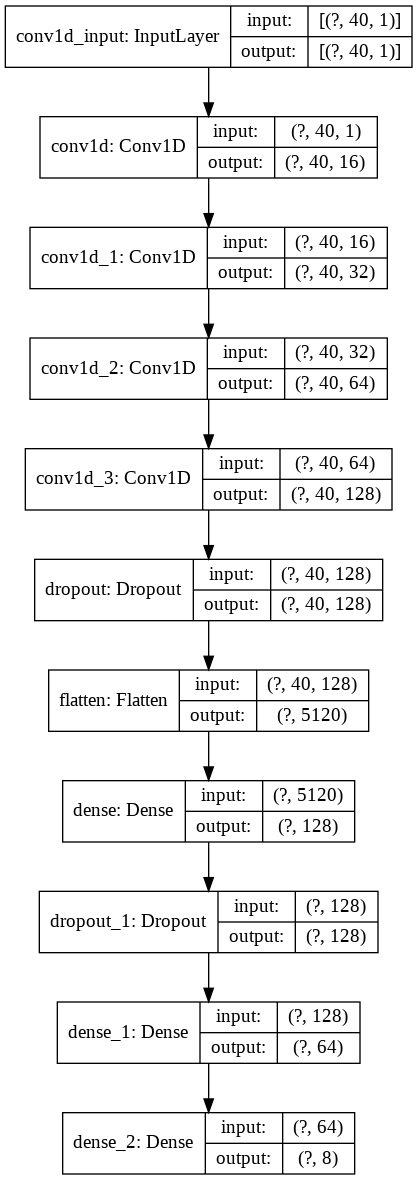

In [ ]:
from keras.utils import plot_model

# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 25,
              verbose = 1,
              validation_data = (x_testcnn, y_test_lb))

Epoch 1/25
36/36 [==============================] - 2s 44ms/step - loss: 1.3744 - accuracy: 0.5022 - val_loss: 1.0124 - val_accuracy: 0.6655
Epoch 2/25
36/36 [==============================] - 1s 38ms/step - loss: 0.9231 - accuracy: 0.6611 - val_loss: 0.8590 - val_accuracy: 0.6725
Epoch 3/25
36/36 [==============================] - 1s 38ms/step - loss: 0.7861 - accuracy: 0.7091 - val_loss: 0.7732 - val_accuracy: 0.7025
Epoch 4/25
36/36 [==============================] - 1s 39ms/step - loss: 0.6732 - accuracy: 0.7438 - val_loss: 0.7263 - val_accuracy: 0.7236
Epoch 5/25
36/36 [==============================] - 1s 38ms/step - loss: 0.5878 - accuracy: 0.7879 - val_loss: 0.6423 - val_accuracy: 0.7676
Epoch 6/25
36/36 [==============================] - 1s 38ms/step - loss: 0.5092 - accuracy: 0.8182 - val_loss: 0.6443 - val_accuracy: 0.7764
Epoch 7/25
36/36 [==============================] - 1s 39ms/step - loss: 0.4240 - accuracy: 0.8504 - val_loss: 0.6791 - val_accuracy: 0.7658
Epoch 8/25
36

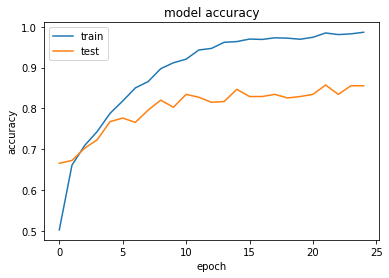

In [ ]:
#Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

18/18 [==============================] - 0s 6ms/step - loss: 0.7047 - accuracy: 0.8556
Pre-training accuracy: 85.5634%


In [ ]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9991196990013123
Testing Accuracy:  0.8556337952613831


** There is a significant increase in the accracy with 85.56% with CNN model**

---



**Add Confusion Matrix**

In [ ]:
#Get predictions from model
y_test_predictions = CNN_model.predict_classes(x_testcnn)
y_test_predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 6, 0, 1, 2, 3, 7, 7, 5, 7, 5, 4, 2, 3, 3, 7, 6, 5, 7, 6, 2, 6,
       5, 6, 1, 4, 0, 0, 5, 7, 7, 2, 2, 0, 2, 6, 7, 3, 3, 2, 7, 1, 0, 4,
       4, 7, 0, 3, 2, 6, 4, 7, 1, 7, 2, 2, 5, 0, 0, 0, 6, 6, 0, 7, 4, 0,
       0, 4, 7, 7, 1, 5, 6, 4, 7, 6, 0, 5, 6, 4, 4, 5, 7, 3, 7, 3, 5, 2,
       5, 0, 5, 2, 5, 6, 6, 7, 7, 4, 6, 2, 7, 4, 0, 7, 2, 7, 3, 2, 4, 1,
       7, 6, 3, 5, 2, 2, 2, 1, 7, 4, 7, 4, 0, 6, 6, 6, 2, 7, 0, 2, 6, 2,
       1, 6, 3, 1, 5, 0, 2, 5, 6, 2, 7, 4, 4, 5, 6, 5, 3, 0, 7, 1, 6, 7,
       5, 0, 6, 6, 4, 7, 4, 5, 1, 7, 7, 5, 7, 3, 7, 6, 5, 7, 2, 7, 3, 3,
       7, 7, 1, 6, 3, 0, 7, 6, 1, 7, 0, 3, 1, 2, 7, 5, 5, 2, 1, 2, 4, 0,
       7, 7, 6, 2, 7, 5, 1, 2, 3, 5, 5, 4, 6, 4, 0, 7, 7, 1, 1, 6, 5, 6,
       0, 4, 7, 2, 0, 7, 7, 4, 6, 3, 3, 2, 7, 5, 6, 2, 7, 6, 4, 4, 3, 0,
       0, 4, 4, 1, 6, 7, 4, 2, 0, 7, 1, 3, 0, 7, 3, 5, 6, 0, 3, 0, 3, 7,
       0, 6, 2, 2, 5, 7, 0, 6, 7, 1, 3, 4, 6, 7, 3, 2, 1, 2, 5, 0, 3, 3,
       7, 2, 6, 2, 2, 5, 0, 2, 3, 3, 2, 7, 7, 3, 0,

In [ ]:
y_test

955         happy
1287        happy
2534        angry
428          calm
2402      disgust
          ...    
2239    surprised
56            sad
208           sad
2377        angry
1407    surprised
Name: emotion, Length: 568, dtype: object

In [ ]:
#Get labels for emotions
y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

In [ ]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels)
y_test_predictions_labels

array(['angry', 'sad', 'angry', 'calm', 'disgust', 'fear', 'surprised',
       'surprised', 'neutral', 'surprised', 'neutral', 'happy', 'disgust',
       'fear', 'fear', 'surprised', 'sad', 'neutral', 'surprised', 'sad',
       'disgust', 'sad', 'neutral', 'sad', 'calm', 'happy', 'angry',
       'angry', 'neutral', 'surprised', 'surprised', 'disgust', 'disgust',
       'angry', 'disgust', 'sad', 'surprised', 'fear', 'fear', 'disgust',
       'surprised', 'calm', 'angry', 'happy', 'happy', 'surprised',
       'angry', 'fear', 'disgust', 'sad', 'happy', 'surprised', 'calm',
       'surprised', 'disgust', 'disgust', 'neutral', 'angry', 'angry',
       'angry', 'sad', 'sad', 'angry', 'surprised', 'happy', 'angry',
       'angry', 'happy', 'surprised', 'surprised', 'calm', 'neutral',
       'sad', 'happy', 'surprised', 'sad', 'angry', 'neutral', 'sad',
       'happy', 'happy', 'neutral', 'surprised', 'fear', 'surprised',
       'fear', 'neutral', 'disgust', 'neutral', 'angry', 'neutral',
  

In [ ]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[65,  0,  3,  1,  1,  0,  0,  2],
       [ 1, 33,  5,  0,  0,  1,  1,  0],
       [ 3,  2, 61,  1,  2,  0,  0,  2],
       [ 0,  2,  2, 63,  3,  0,  4,  2],
       [ 1,  3,  6,  3, 55,  0,  2,  3],
       [ 0,  2,  1,  1,  0, 55,  0,  2],
       [ 0,  1,  1,  1,  0,  2, 64,  3],
       [ 2,  0,  5,  1,  2,  0,  2, 90]])

In [ ]:
#See confusion matrix shape
confusion_matrix.shape

(8, 8)

In [ ]:
#Turn al correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[0, 0, 3, 1, 1, 0, 0, 2],
       [1, 0, 5, 0, 0, 1, 1, 0],
       [3, 2, 0, 1, 2, 0, 0, 2],
       [0, 2, 2, 0, 3, 0, 4, 2],
       [1, 3, 6, 3, 0, 0, 2, 3],
       [0, 2, 1, 1, 0, 0, 0, 2],
       [0, 1, 1, 1, 0, 2, 0, 3],
       [2, 0, 5, 1, 2, 0, 2, 0]])

In [ ]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,angry,calm,disgust,fear,happy,neutral,sad,surprised
angry,0,0,3,1,1,0,0,2
calm,1,0,5,0,0,1,1,0
disgust,3,2,0,1,2,0,0,2
fear,0,2,2,0,3,0,4,2
happy,1,3,6,3,0,0,2,3
neutral,0,2,1,1,0,0,0,2
sad,0,1,1,1,0,2,0,3
surprised,2,0,5,1,2,0,2,0


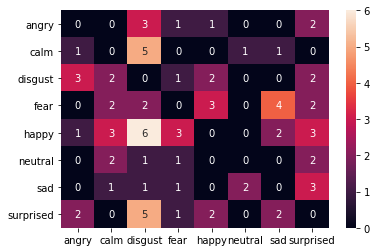

In [ ]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)

**Save CNN Model**

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('capstone_project_emotion_detection_final_version.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('capstone_project_emotion_detection_final_version.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('capstone_project_emotion_detection_final_version.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("capstone_project_emotion_detection_final_version.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('capstone_project_emotion_detection_final_version.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_load = keras.models.model_from_json(json_savedModel)
model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 16)            96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 32)            2592      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 64)            10304     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 40, 128)           41088     
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               6